In [1]:
# setting uop working directory
import os
os.getcwd() 
import sys
sys.path.append('../ThinkStats2-master/code')

In [2]:
import pandas as pd 
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
  
# creating a data frame 

gss = pd.read_csv("GSS7218_R3.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#gss = pd.read_csv("GSS7218_R3.csv")                                      
                                        

In [3]:
gss_clean = gss[["YEAR","SEX","AGE","INCOME","COHORT","RACE","EDUC","REALINC","WTSSALL"]].copy()


In [4]:
# Original dataset file is hige , can not upload original dataset file. Creating a subset si I can upload it 
gss_clean.to_csv("Clean_data.csv")

In [5]:
gss_clean

,YEAR,SEX,AGE,INCOME,COHORT,RACE,EDUC,REALINC,WTSSALL
0,1972,2,23,0,1949,1,16,18951,.4446
1,1972,1,70,0,1902,1,10,24366,.8893
2,1972,2,48,0,1924,1,12,24366,.8893
3,1972,2,27,0,1945,1,17,30458,.8893
4,1972,2,61,0,1911,1,12,50763,.8893
...,...,...,...,...,...,...,...,...,...
64809,2018,2,37,13,1981,1,12,0,.47149855482662
64810,2018,2,75,12,1943,1,12,14755,.94299710965324
64811,2018,2,67,12,1951,1,12,45400,.94299710965324
64812,2018,1,72,12,1946,1,16,24970,.94299710965324


In [6]:
# Compute the PMF for year
pmf_year=thinkstats2.Pmf(gss_clean.YEAR)


In [7]:
age = gss_clean['AGE']

In [8]:
pmf_age = thinkstats2.Pmf(gss_clean.AGE.astype(float))

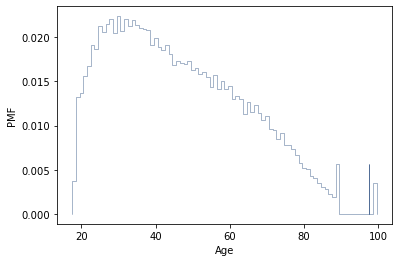

In [9]:

# Plot the PMF
 
# Label the axes
thinkplot.Pmf(pmf_age,linewidth=0.5)
thinkplot.Config(xlabel='Age', ylabel='PMF')





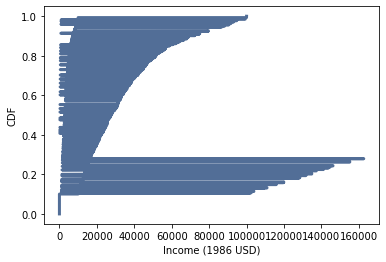

In [10]:
# Select realinc


income = gss_clean.REALINC
 
# Make the CDF
cdf_income = thinkstats2.Cdf(income)
thinkplot.Cdf(cdf_income)
thinkplot.Config(xlabel='Income (1986 USD)', ylabel='CDF')




In [11]:
thinkstats2.Cdf(gss_clean.EDUC)

Cdf(['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '3'
 '4' '5' '6' '7' '8' '9' '98' '99'], [0.00254575 0.0032709  0.04770574 0.10545561 0.40883143 0.49152961
 0.60199957 0.64689728 0.77580461 0.80615299 0.84293517 0.85712963
 0.8594748  0.8816768  0.88564199 0.89056377 0.89676613 0.90954115
 0.92310303 0.96513099 0.99726911 0.99839541 1.        ])

In [12]:
educ = gss_clean['EDUC'].astype(int)
educ.describe()


count    64814.000000
mean        13.103774
std          5.483884
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         99.000000
Name: EDUC, dtype: float64

In [13]:
# Bachelor's degree
bach = (educ >= 16)
 
# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5267689079519857


In [14]:
bach,assc

(0         True
 1        False
 2        False
 3         True
 4        False
          ...  
 64809    False
 64810    False
 64811    False
 64812     True
 64813    False
 Name: EDUC, Length: 64814, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 64809    False
 64810    False
 64811    False
 64812    False
 64813    False
 Name: EDUC, Length: 64814, dtype: bool)

In [15]:
gss_clean.YEAR.describe()

count     64814
unique       32
top        2006
freq       4510
Name: YEAR, dtype: object

In [16]:

pre95=gss_clean.YEAR.astype(int) < 1995

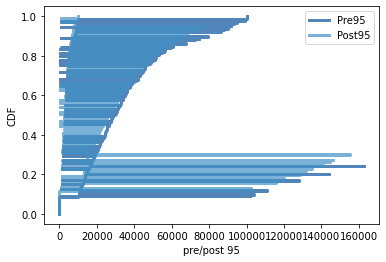

In [17]:
income_pre95=income[pre95]
income_post95=income[~pre95]

income_pre95=thinkstats2.Cdf(income[pre95],label='Pre95')
income_post95=thinkstats2.Cdf(income[~pre95],label='Post95')

thinkplot.PrePlot(2)

thinkplot.Cdfs([income_pre95, income_post95])
thinkplot.Config(xlabel='pre/post 95', ylabel='CDF')



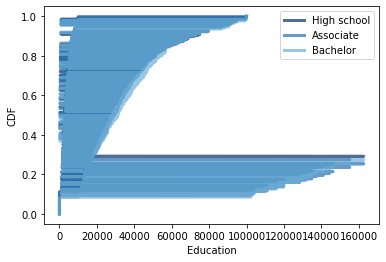

In [18]:

# Label the axes

income_high=thinkstats2.Cdf(income[high],label='High school')
income_assc=thinkstats2.Cdf(income[assc],label='Associate')
income_batch=thinkstats2.Cdf(income[bach],label='Bachelor')

thinkplot.PrePlot(3)

thinkplot.Cdfs([income_high, income_assc,income_batch])
thinkplot.Config(xlabel='Education', ylabel='CDF')

In [19]:

income_ft=income.astype(float)
income_ft.describe()

count     64814.000000
mean      28548.912992
std       29584.666171
min           0.000000
25%        8595.000000
50%       21060.000000
75%       37455.000000
max      162607.000000
Name: REALINC, dtype: float64

In [20]:
# Extract realinc and compute its log

log_income = np.log10(income_ft+.000001)
 
# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)
# 4.371148677934171 0.42900437330100427
 
# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

3.2804697678882446 3.1326461920991147


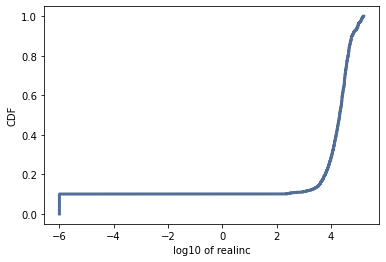

In [21]:

cdf = thinkstats2.Cdf(log_income)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='log10 of realinc', ylabel='CDF')

In [46]:
#Histogram of 5 variables
gss_clean.YEAR.astype(int).describe()

count    64814.000000
mean      1994.939180
std         13.465368
min       1972.000000
25%       1984.000000
50%       1996.000000
75%       2006.000000
max       2018.000000
Name: YEAR, dtype: float64

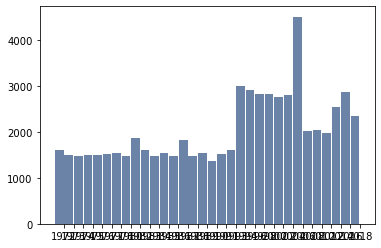

In [47]:
hist_year=thinkstats2.Hist(gss_clean.YEAR)
thinkplot.Hist(hist_year)

1951.0 2039.0
Series([], Name: AGE, dtype: object)
0        True
1        True
2        True
3        True
4        True
         ... 
64809    True
64810    True
64811    True
64812    True
64813    True
Name: YEAR, Length: 64814, dtype: bool


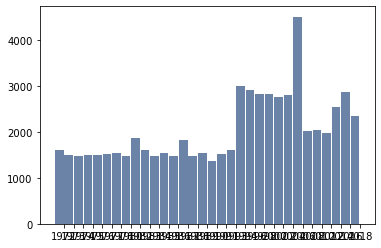

In [48]:
# determining outliers in the data 
Q1=gss_clean.YEAR.astype(int).quantile(0.25)
Q3=gss_clean.YEAR.astype(int).quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
print(lower_limit,upper_limit)



outlier=(gss_clean.YEAR.astype(int) < lower_limit ) | (gss_clean.YEAR.astype(int) > upper_limit)
year_clean= (gss_clean.YEAR.astype(int) <= upper_limit )& (gss_clean.YEAR.astype(int) >= lower_limit)

print(gss_clean.AGE[outlier])
print(year_clean)

clean_hist=thinkstats2.Hist(gss_clean.YEAR[year_clean])

thinkplot.Hist(clean_hist)

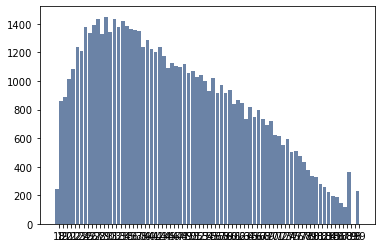

In [49]:
hist_age=thinkstats2.Hist(gss_clean.AGE)
thinkplot.Hist(hist_age)

In [50]:

gss_clean.AGE.astype(int).describe()

count    64814.000000
mean        46.285432
std         17.781802
min         18.000000
25%         32.000000
50%         44.000000
75%         59.000000
max         99.000000
Name: AGE, dtype: float64

18 99.5
Series([], Name: AGE, dtype: object)
0        True
1        True
2        True
3        True
4        True
         ... 
64809    True
64810    True
64811    True
64812    True
64813    True
Name: AGE, Length: 64814, dtype: bool


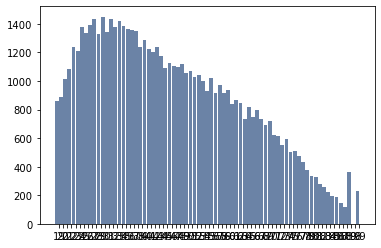

In [51]:
# Determines outliers in the data 
Q1=gss_clean.AGE.astype(int).quantile(0.25)
Q3=gss_clean.AGE.astype(int).quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR


lower_limit=18
print(lower_limit,upper_limit)

outlier=(gss_clean.AGE.astype(int) < lower_limit ) | (gss_clean.AGE.astype(int) > upper_limit)
age_clean= (gss_clean.AGE.astype(int) < upper_limit )& (gss_clean.AGE.astype(int) > lower_limit)

print(gss_clean.AGE[outlier])
print(age_clean)

ages=gss_clean.AGE[age_clean]

clean_hist=thinkstats2.Hist(gss_clean.AGE[age_clean])

thinkplot.Hist(clean_hist)

In [52]:
gss_clean.REALINC.astype(float).describe()

count     64814.000000
mean      28548.912992
std       29584.666171
min           0.000000
25%        8595.000000
50%       21060.000000
75%       37455.000000
max      162607.000000
Name: REALINC, dtype: float64

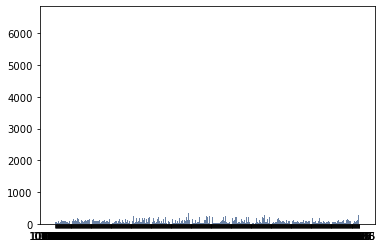

In [53]:
hist_income=thinkstats2.Hist(gss_clean.REALINC)
thinkplot.Hist(hist_income)

-34695.0 80745.0
0 80745.0
187            109355
188            109355
189            109355
241            109355
244            109355
             ...     
64565    119879.41732
64574    119879.41732
64622    119879.41732
64637    119879.41732
64798    119879.41732
Name: REALINC, Length: 4503, dtype: object
0         True
1         True
2         True
3         True
4         True
         ...  
64809    False
64810     True
64811     True
64812     True
64813    False
Name: REALINC, Length: 64814, dtype: bool


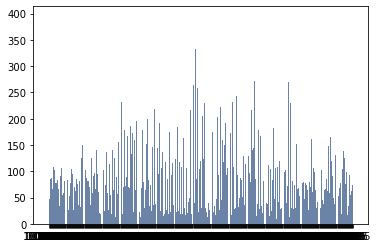

In [54]:
# determining outliers in the data 
Q1=gss_clean.REALINC.astype(float).quantile(0.25)
Q3=gss_clean.REALINC.astype(float).quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
print(lower_limit,upper_limit)

lower_limit=0
print(lower_limit,upper_limit)
outlier=(gss_clean.REALINC.astype(float) < lower_limit ) | (gss_clean.REALINC.astype(float) > upper_limit)
income_clean= (gss_clean.REALINC.astype(float) < upper_limit )& (gss_clean.REALINC.astype(float) > lower_limit)

print(gss_clean.REALINC[outlier])
print(income_clean)

income_cl=gss_clean.REALINC[income_clean]

clean_hist=thinkstats2.Hist(gss_clean.REALINC[income_clean])

thinkplot.Hist(clean_hist)


In [55]:
gss_clean.EDUC.astype(int).describe()

count    64814.000000
mean        13.103774
std          5.483884
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         99.000000
Name: EDUC, dtype: float64

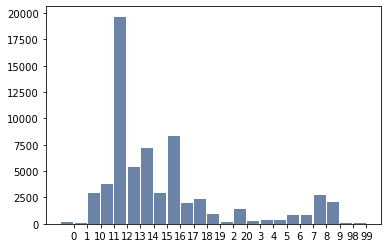

In [56]:
hist_edu=thinkstats2.Hist(gss_clean.EDUC)
thinkplot.Hist(hist_edu)

7.5 19.5
11        6
30        6
38        6
70        7
80        7
         ..
64764     6
64769     6
64781    98
64783    20
64799    20
Name: EDUC, Length: 4665, dtype: object
0        True
1        True
2        True
3        True
4        True
         ... 
64809    True
64810    True
64811    True
64812    True
64813    True
Name: EDUC, Length: 64814, dtype: bool


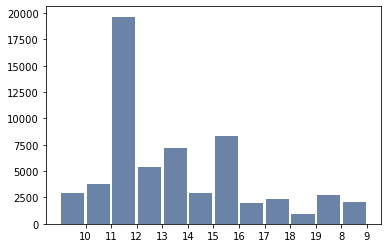

In [57]:
# determining outliers in the data 
Q1=gss_clean.EDUC.astype(int).quantile(0.25)
Q3=gss_clean.EDUC.astype(int).quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
print(lower_limit,upper_limit)



outlier=(gss_clean.EDUC.astype(int) < lower_limit ) | (gss_clean.EDUC.astype(int) > upper_limit)
edu_clean= (gss_clean.EDUC.astype(int) < upper_limit )& (gss_clean.EDUC.astype(int) > lower_limit)

print(gss_clean.EDUC[outlier])
print(edu_clean)

education=gss_clean.EDUC[edu_clean]

clean_hist=thinkstats2.Hist(gss_clean.EDUC[edu_clean])

thinkplot.Hist(clean_hist)

In [58]:
gss_clean.COHORT.astype(int).describe()

count    64814.000000
mean      1977.164625
std        477.095733
min       1883.000000
25%       1935.000000
50%       1951.000000
75%       1964.000000
max       9999.000000
Name: COHORT, dtype: float64

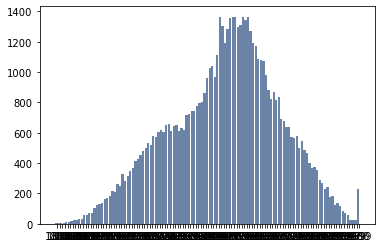

In [59]:
hist_coho=thinkstats2.Hist(gss_clean.COHORT)
thinkplot.Hist(hist_coho)

1891.5 2007.5
141      1888
144      1890
168      1891
228      9999
234      1890
         ... 
63124    9999
63906    9999
63938    9999
64027    9999
64428    9999
Name: COHORT, Length: 342, dtype: object
0        True
1        True
2        True
3        True
4        True
         ... 
64809    True
64810    True
64811    True
64812    True
64813    True
Name: EDUC, Length: 64814, dtype: bool


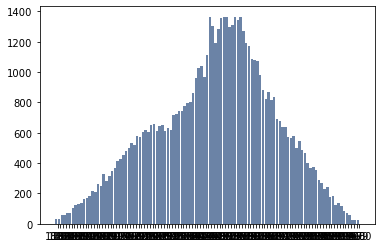

In [60]:
# determining outliers in the data 
Q1=gss_clean.COHORT.astype(int).quantile(0.25)
Q3=gss_clean.COHORT.astype(int).quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
print(lower_limit,upper_limit)



outlier=(gss_clean.COHORT.astype(int) < lower_limit ) | (gss_clean.COHORT.astype(int) > upper_limit)
coho_clean= (gss_clean.COHORT.astype(int) < upper_limit )& (gss_clean.COHORT.astype(int) > lower_limit)

print(gss_clean.COHORT[outlier])
print(edu_clean)

clean_hist=thinkstats2.Hist(gss_clean.COHORT[coho_clean])

thinkplot.Hist(clean_hist)

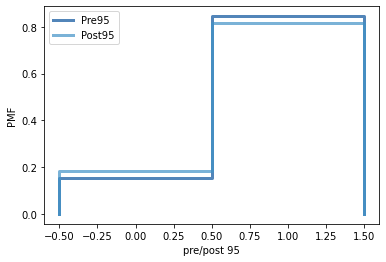

In [61]:
#income_clean=income[income_clean]

income_pre95=thinkstats2.Pmf(income_clean[pre95].astype(float),label='Pre95')
income_post95=thinkstats2.Pmf(income_clean[~pre95].astype(float),label='Post95')

thinkplot.PrePlot(2)

thinkplot.Pmfs([income_pre95, income_post95])
thinkplot.Config(xlabel='pre/post 95', ylabel='PMF')


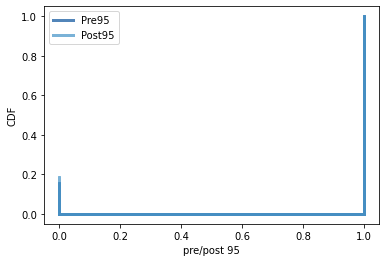

In [62]:


income_pre95=thinkstats2.Cdf(income_clean[pre95].astype(float),label='Pre95')
income_post95=thinkstats2.Cdf(income_clean[~pre95].astype(float),label='Post95')

thinkplot.PrePlot(2)

thinkplot.Pmfs([income_pre95, income_post95])
thinkplot.Config(xlabel='pre/post 95', ylabel='CDF')

In [63]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [64]:
#cov
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [66]:
ages=gss_clean.AGE[income_clean]

In [67]:
income_cl=np.log10(gss_clean.REALINC[income_clean].astype(float)+.00001)


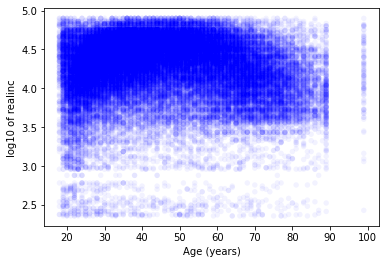

In [68]:
# Solution


def ScatterPlot(ages, income, alpha=1.0, s=20):
    """Make a scatter plot and save it.

    ages: sequence of float
    income: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, income, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='log10 of realinc'
                   )
    
ScatterPlot(ages.astype(float),income_cl.astype(float), alpha=0.05,s=100)

#ages.describe()

In [69]:
# Solution
#income_pre95=thinkstats2.Cdf(income_clean[pre95].astype(float),label='Pre95')
#income_post95=thinkstats2.Cdf(income_clean[~pre95].astype(float),label='Post95')

def RunTests(income, iters=1000):
    """Runs the tests from Chapter 9 with a subset of the data.

    live: DataFrame
    iters: how many iterations to run
    """
    n = len(income)

    # compare pregnancy lengths
    data = income_clean[pre95].astype(float), income_clean[~pre95].astype(float)
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)



    print('%d\t%0.2f' % (n, p1))

In [70]:
#To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and generate simulated results by shuffling the data.

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [71]:
# Solution

n = len(income_clean)
for _ in range(7):
    sample = thinkstats2.SampleRows(income_clean, n)
    RunTests(sample)
    n //= 2

64814	0.00
32407	0.00
16203	0.00
8101	0.00
4050	0.00
2025	0.00
1012	0.00


In [73]:
df = gss_clean.copy()

cols=df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [74]:
import statsmodels.formula.api as smf

formula='REALINC~EDUC+AGE+SEX'
model = smf.poisson(formula, data=df)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 12606.524046
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                REALINC   No. Observations:                64814
Model:                        Poisson   Df Residuals:                    64810
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.03929
Time:                        22:14:19   Log-Likelihood:            -8.1708e+08
converged:                       True   LL-Null:                   -8.5050e+08
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4999   9.91e-05   1.06e+05      0.000      10.500      10.500
EDUC           0.0178   2.39e-06   7434.790      0.000       0.018       0.018
AGE           -0.0035   1.33e-06  -2631.639      0.000      -0.004      -0.004
SEX           -0.2092   4.65e-05  -4495.969      0.000      -0.209      -0.209
==============================================================================
"""